In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table


In [17]:
# create engine to hawaii.sqlite
hawaiiDBengine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=hawaiiDBengine)


In [19]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [20]:
# Save references to each table
StationTable = Base.classes.station

MeasurementTable = Base.classes.measurement

In [21]:
# Create our session (link) from Python to the DB
hawaiiDBsession =  Session(hawaiiDBengine)


# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.

recentDate =(hawaiiDBsession.query(MeasurementTable.date)
             .order_by(MeasurementTable.date.desc())
                .first())
recentDate


('2017-08-23',)

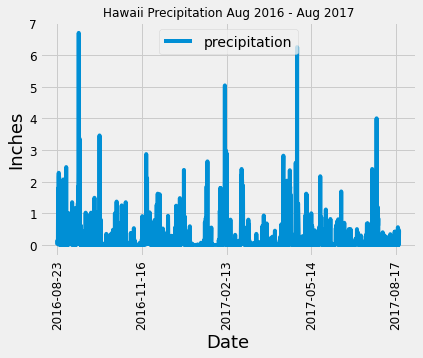

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

oneYear= dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.

prevLastDate = dt.date(oneYear.year, oneYear.month, oneYear.day)

# Perform a query to retrieve the data and precipitation scores

hawaiiPRCPResults=hawaiiDBsession.query(MeasurementTable.date, MeasurementTable.prcp).filter(MeasurementTable.date >= prevLastDate).order_by(MeasurementTable.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

hawaiiPRPCDF=pd.DataFrame(hawaiiPRCPResults, columns=['date', 'precipitation'])

# Sort the dataframe by date

hawaiiPRPCDF.set_index(hawaiiPRPCDF['date'], inplace =True)

#drop N/A cells
finalhawaiiDF = hawaiiPRPCDF.dropna()

# Use Pandas Plotting with Matplotlib to plot the data

finalhawaiiDF.plot('date', 'precipitation')


plt.xlabel("Date",  size = 18)
plt.ylabel("Inches", size = 18)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 12)
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.show()


In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
finalhawaiiDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
hawaiiDBsession.query(StationTable.id).count()

9

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

hawaiiDBsession.query(MeasurementTable.station,func.count(MeasurementTable.station)).group_by(MeasurementTable.station)\
.order_by(func.count(MeasurementTable.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
hawaiiDBsession.query(func.min(MeasurementTable.tobs),func.max(MeasurementTable.tobs),func.avg(MeasurementTable.tobs))\
    .filter(MeasurementTable.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

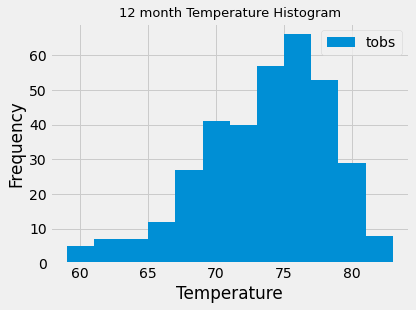

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


stationResults = hawaiiDBsession.query(MeasurementTable.tobs).filter(MeasurementTable.station=='USC00519281')\
    .filter(MeasurementTable.date>='2016-08-23').all()

#Plot results
stationTempDF=pd.DataFrame(stationResults,columns=['tobs'])
stationTempDF.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [36]:
# Close Session
hawaiiDBsession.close()